# <div style="text-align: center"> Code for place tuning and correlation matrices

## Load dependencies

In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import pandas as pd
from ipyfilechooser import FileChooser
from linear2ac.io import get_main_data_folder
import zarr
import vr2p

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load place field data for a particular animal

In [3]:
animal = 'Tyche-A7'
# load data.
path = f'/.../Tyche/vr2p_datasets/Set A/{animal}-SetA.zarr/'

data = vr2p.ExperimentData(path)

# Generate index for days animal is performing Cue Set A only.
day_count = []

for i in range(len(data.signals.multi_session.F)):
    if ('Cue Set A' in data.vr[i].trial.set.unique()) and (len(data.vr[i].trial.set.unique())==1):
        day_count.append(i)
    else:
        break
print(max(day_count))

#load stored place field analysis for each day

range_A = range(max(day_count)+1)
criteria = 'putative'

zarr_location = get_main_data_folder()/'placefields'/'50_600_SetA'/f"Tyche-A7-PF.zarr"
#zarr_file = zarr.open(zarr_location.as_posix(), mode="r")
zarr_file = zarr.open(f'/.../Tyche/vr2p_datasets/placefields/50_600_SetA/Tyche-A7-PF.zarr', mode="r")

pf_all_T1 = [zarr_file[f'Cue Set A/1/excl_no_response/{i}/{criteria}'][()] for i in range_A]
pf_all_T2 = [zarr_file[f'Cue Set A/2/excl_no_response/{i}/{criteria}'][()] for i in range_A]

binF_T1 = [zarr_file[f'Cue Set A/1/excl_no_response/{i}/{criteria}'][()]['binF'] for i in range_A]
binF_T2 = [zarr_file[f'Cue Set A/2/excl_no_response/{i}/{criteria}'][()]['binF'] for i in range_A]

binF_T1_all = np.array(binF_T1).T
binF_T2_all = np.array(binF_T2).T

8


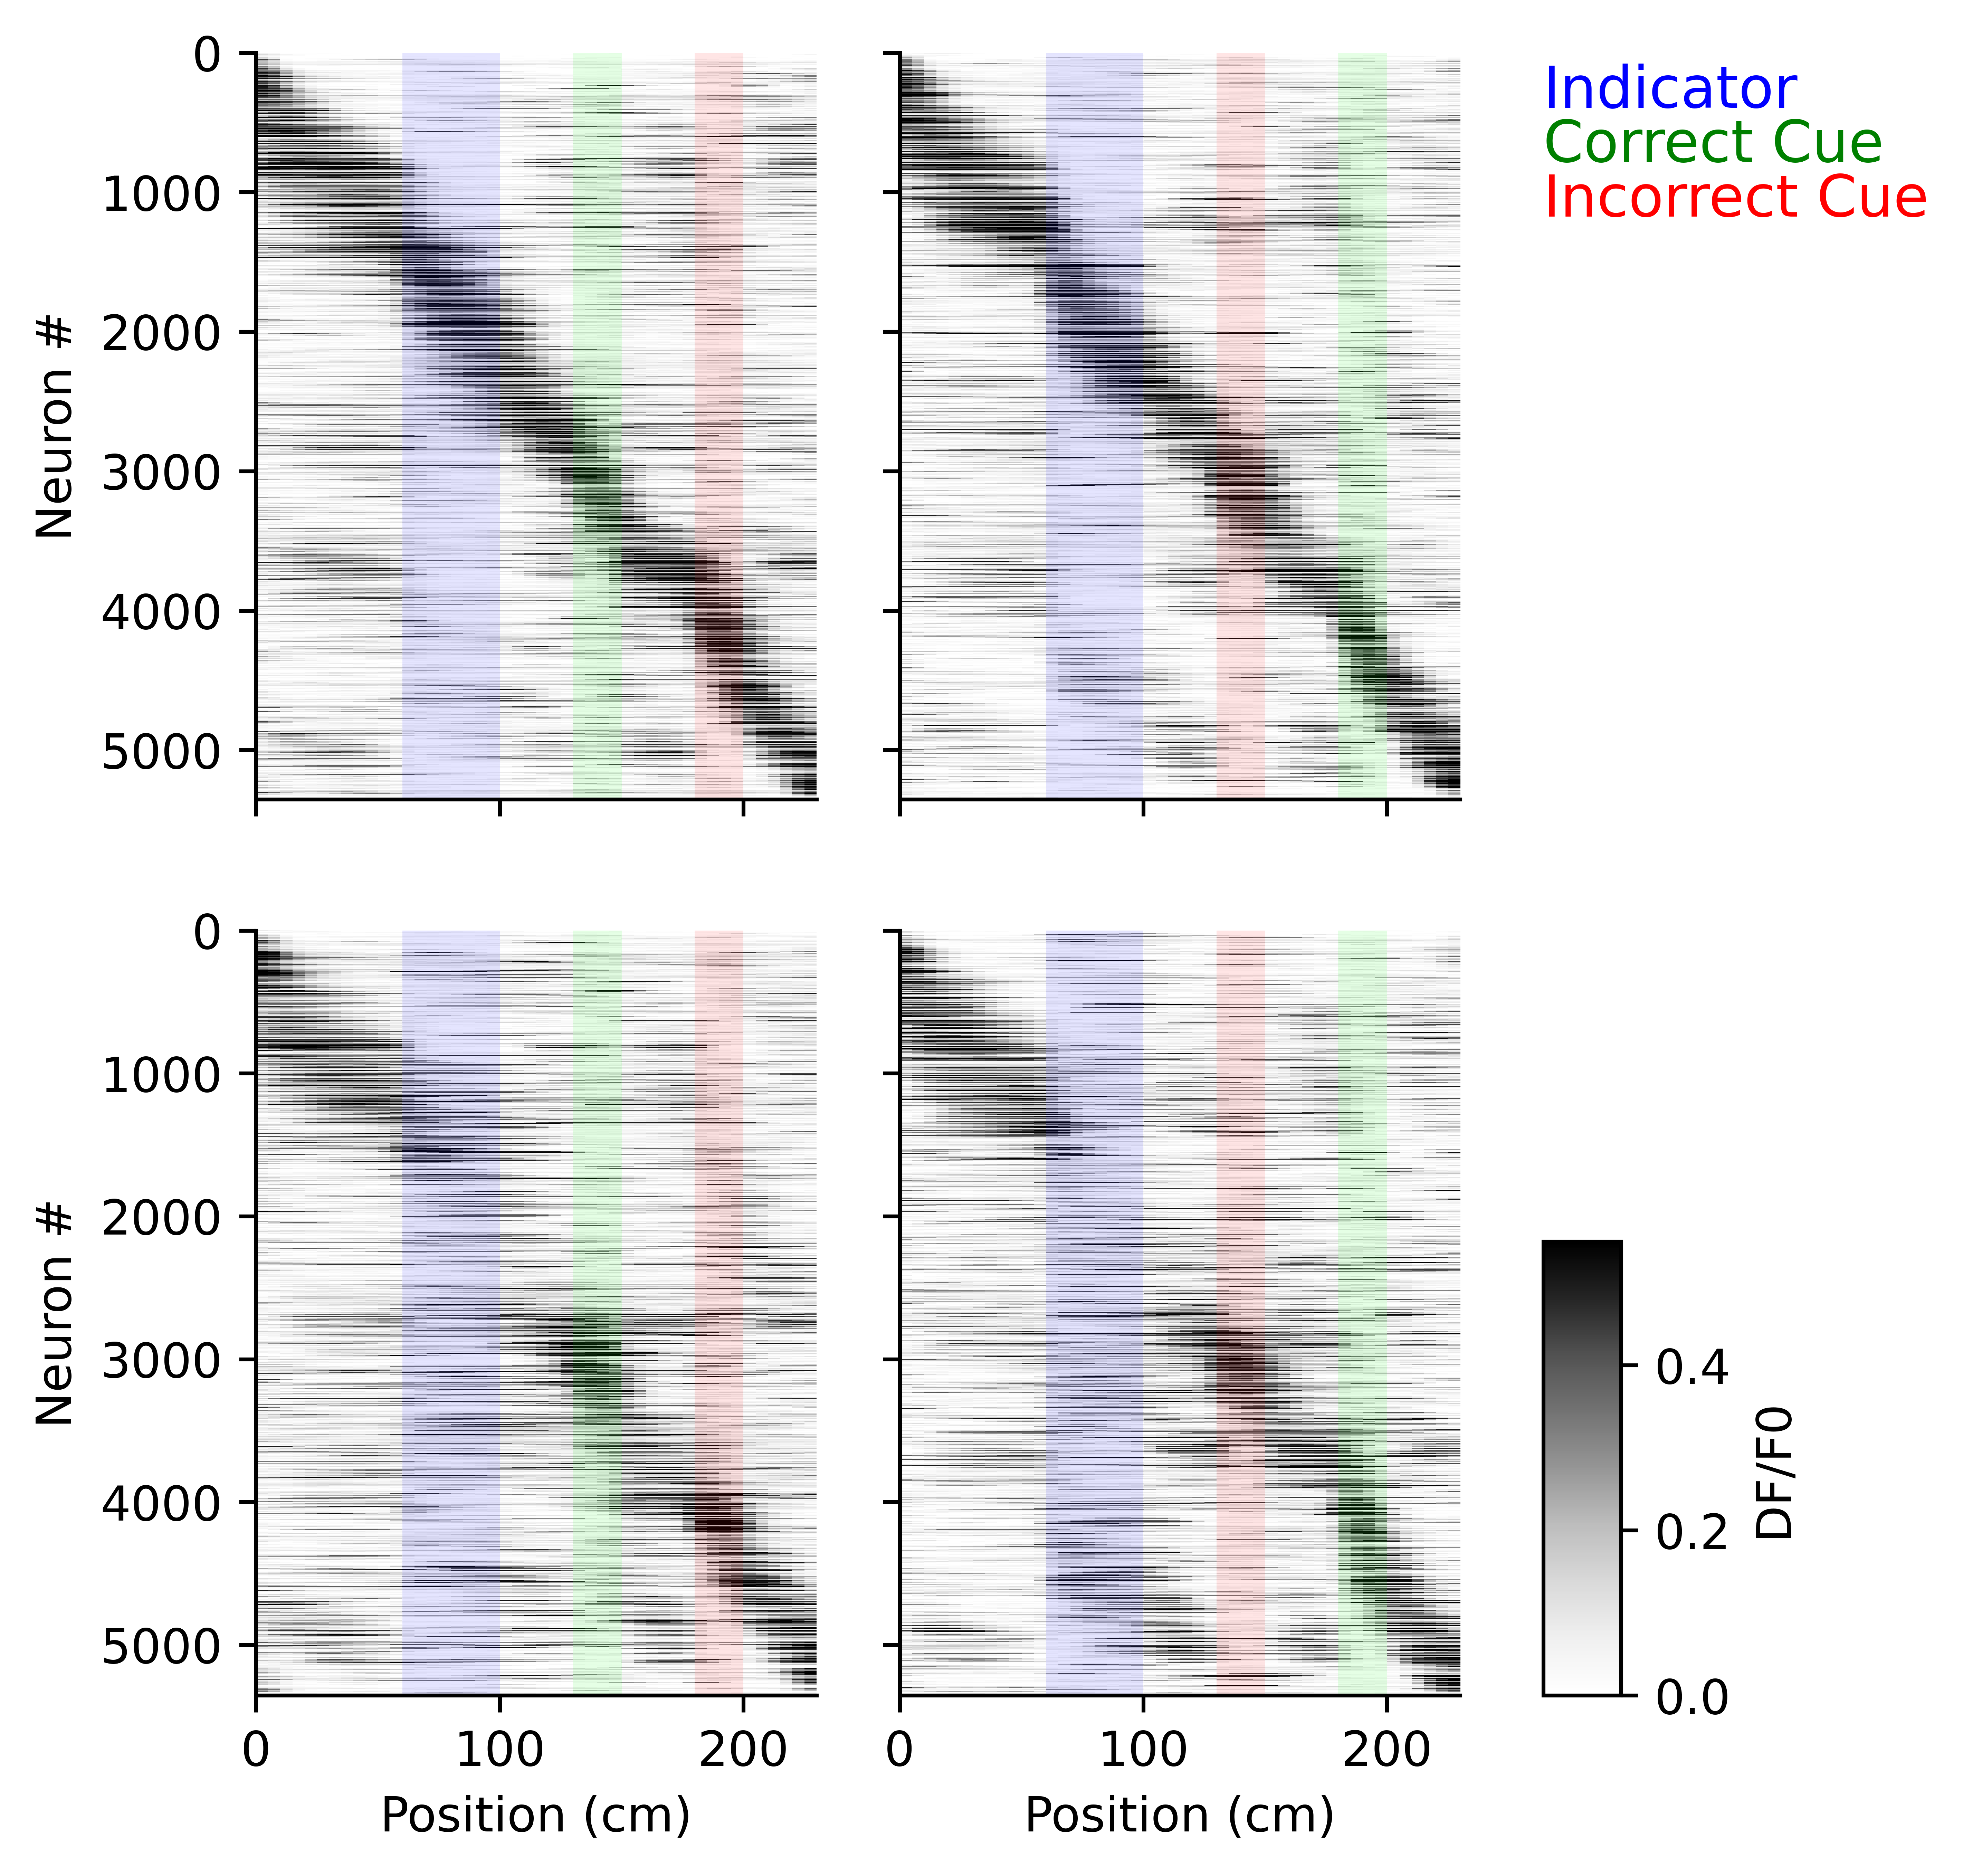

In [60]:
import figrid as fg

session = 1 #in the paper we use 1-based indexing, session 1 here is session 2 in the paper. 

vmin = 0
vmax = 0.55
region_marker_opacity = 0.1
dpi = 1000

fig = plt.figure(figsize=(6,7),edgecolor='black',dpi=dpi,facecolor='white')
axs = {
    'T1xT1': fg.place_axes_on_grid(fig, xspan=[0, .35], yspan=[0.1, .515]),
    'T2xT2': fg.place_axes_on_grid(fig, xspan=[0.4, .75], yspan=[0.1, .515]),
    'T1xT2': fg.place_axes_on_grid(fig, xspan=[0, .35], yspan=[0.585, 1]),
    'T2xT1': fg.place_axes_on_grid(fig, xspan=[0.4, .75], yspan=[0.585, 1]),
    'colorbar': fg.place_axes_on_grid(fig, xspan=[0.8, 0.85], yspan=[0.75, 1]),
    'legends': fg.place_axes_on_grid(fig, xspan=[0.8, 1], yspan=[0.1, 0.4]),
}
# labels = [
#     {'label_text':f"{animal} - Session {session}", 'xpos':0.45,    'ypos':0.05, 'fontsize':12, 'weight': 'bold', 'ha': 'center', 'va': 'bottom'},
# ]
# fg.add_labels(fig, labels)

# format axis.
# axs['T1xT1'].title.set_text('T1')
# axs['T2xT2'].title.set_text('T2')
# axs['T1xT2'].title.set_text('T1 ordered by T2')
# axs['T2xT1'].title.set_text('T2 ordered by T1')

axs['T1xT1'].set_xticklabels('')
axs['T2xT2'].set_xticklabels('')
axs['T2xT2'].set_yticklabels('')
axs['T2xT1'].set_yticklabels('')

axs['T1xT1'].set_ylabel('Neuron #')
axs['T1xT2'].set_ylabel('Neuron #')
axs['T1xT2'].set_xlabel('Position (cm)')
axs['T2xT1'].set_xlabel('Position (cm)')

def plot_axis(ax,im,color1,color2):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    h = ax.imshow(im,aspect='auto',interpolation='none',cmap='Greys',
                  extent=(0,230,im.shape[0],0),vmin=vmin,vmax=vmax)
    # plot reward pos
    ax.axvspan(130,150,facecolor=color1,edgecolor=None)
    ax.axvspan(180,200,facecolor=color2,edgecolor=None)
    ax.axvspan(60,100,facecolor=(0,0,1,region_marker_opacity),edgecolor=None)
    return h

# plot heatmap.
correct_color = (0,1,0,region_marker_opacity)
incorrect_color = (1,0,0,region_marker_opacity)
h = plot_axis(axs['T1xT1'],binF_T1[session][pf_all_T1[session]['order'],:],correct_color,incorrect_color)
plot_axis(axs['T2xT2'],binF_T2[session][pf_all_T2[session]['order'],:],incorrect_color,correct_color)
plot_axis(axs['T1xT2'],binF_T1[session][pf_all_T2[session]['order'],:],correct_color,incorrect_color)
plot_axis(axs['T2xT1'],binF_T2[session][pf_all_T1[session]['order'],:],incorrect_color,correct_color)

# legends.
ax = axs['legends']
ax.axis('off')
ax.text(0, 0.9, 'Indicator', fontsize=12, color='blue')
ax.text(0, 0.8, 'Correct Cue', fontsize=12, color='green')
ax.text(0, 0.7, 'Incorrect Cue', fontsize=12, color='red')

# colorbar.
cb = fig.colorbar(h,cax=axs['colorbar'])
cb.set_label('DF/F0')

plt.savefig(f'Fig_2_place_field_session_{session+1}.pdf', dpi=dpi, bbox_inches='tight')

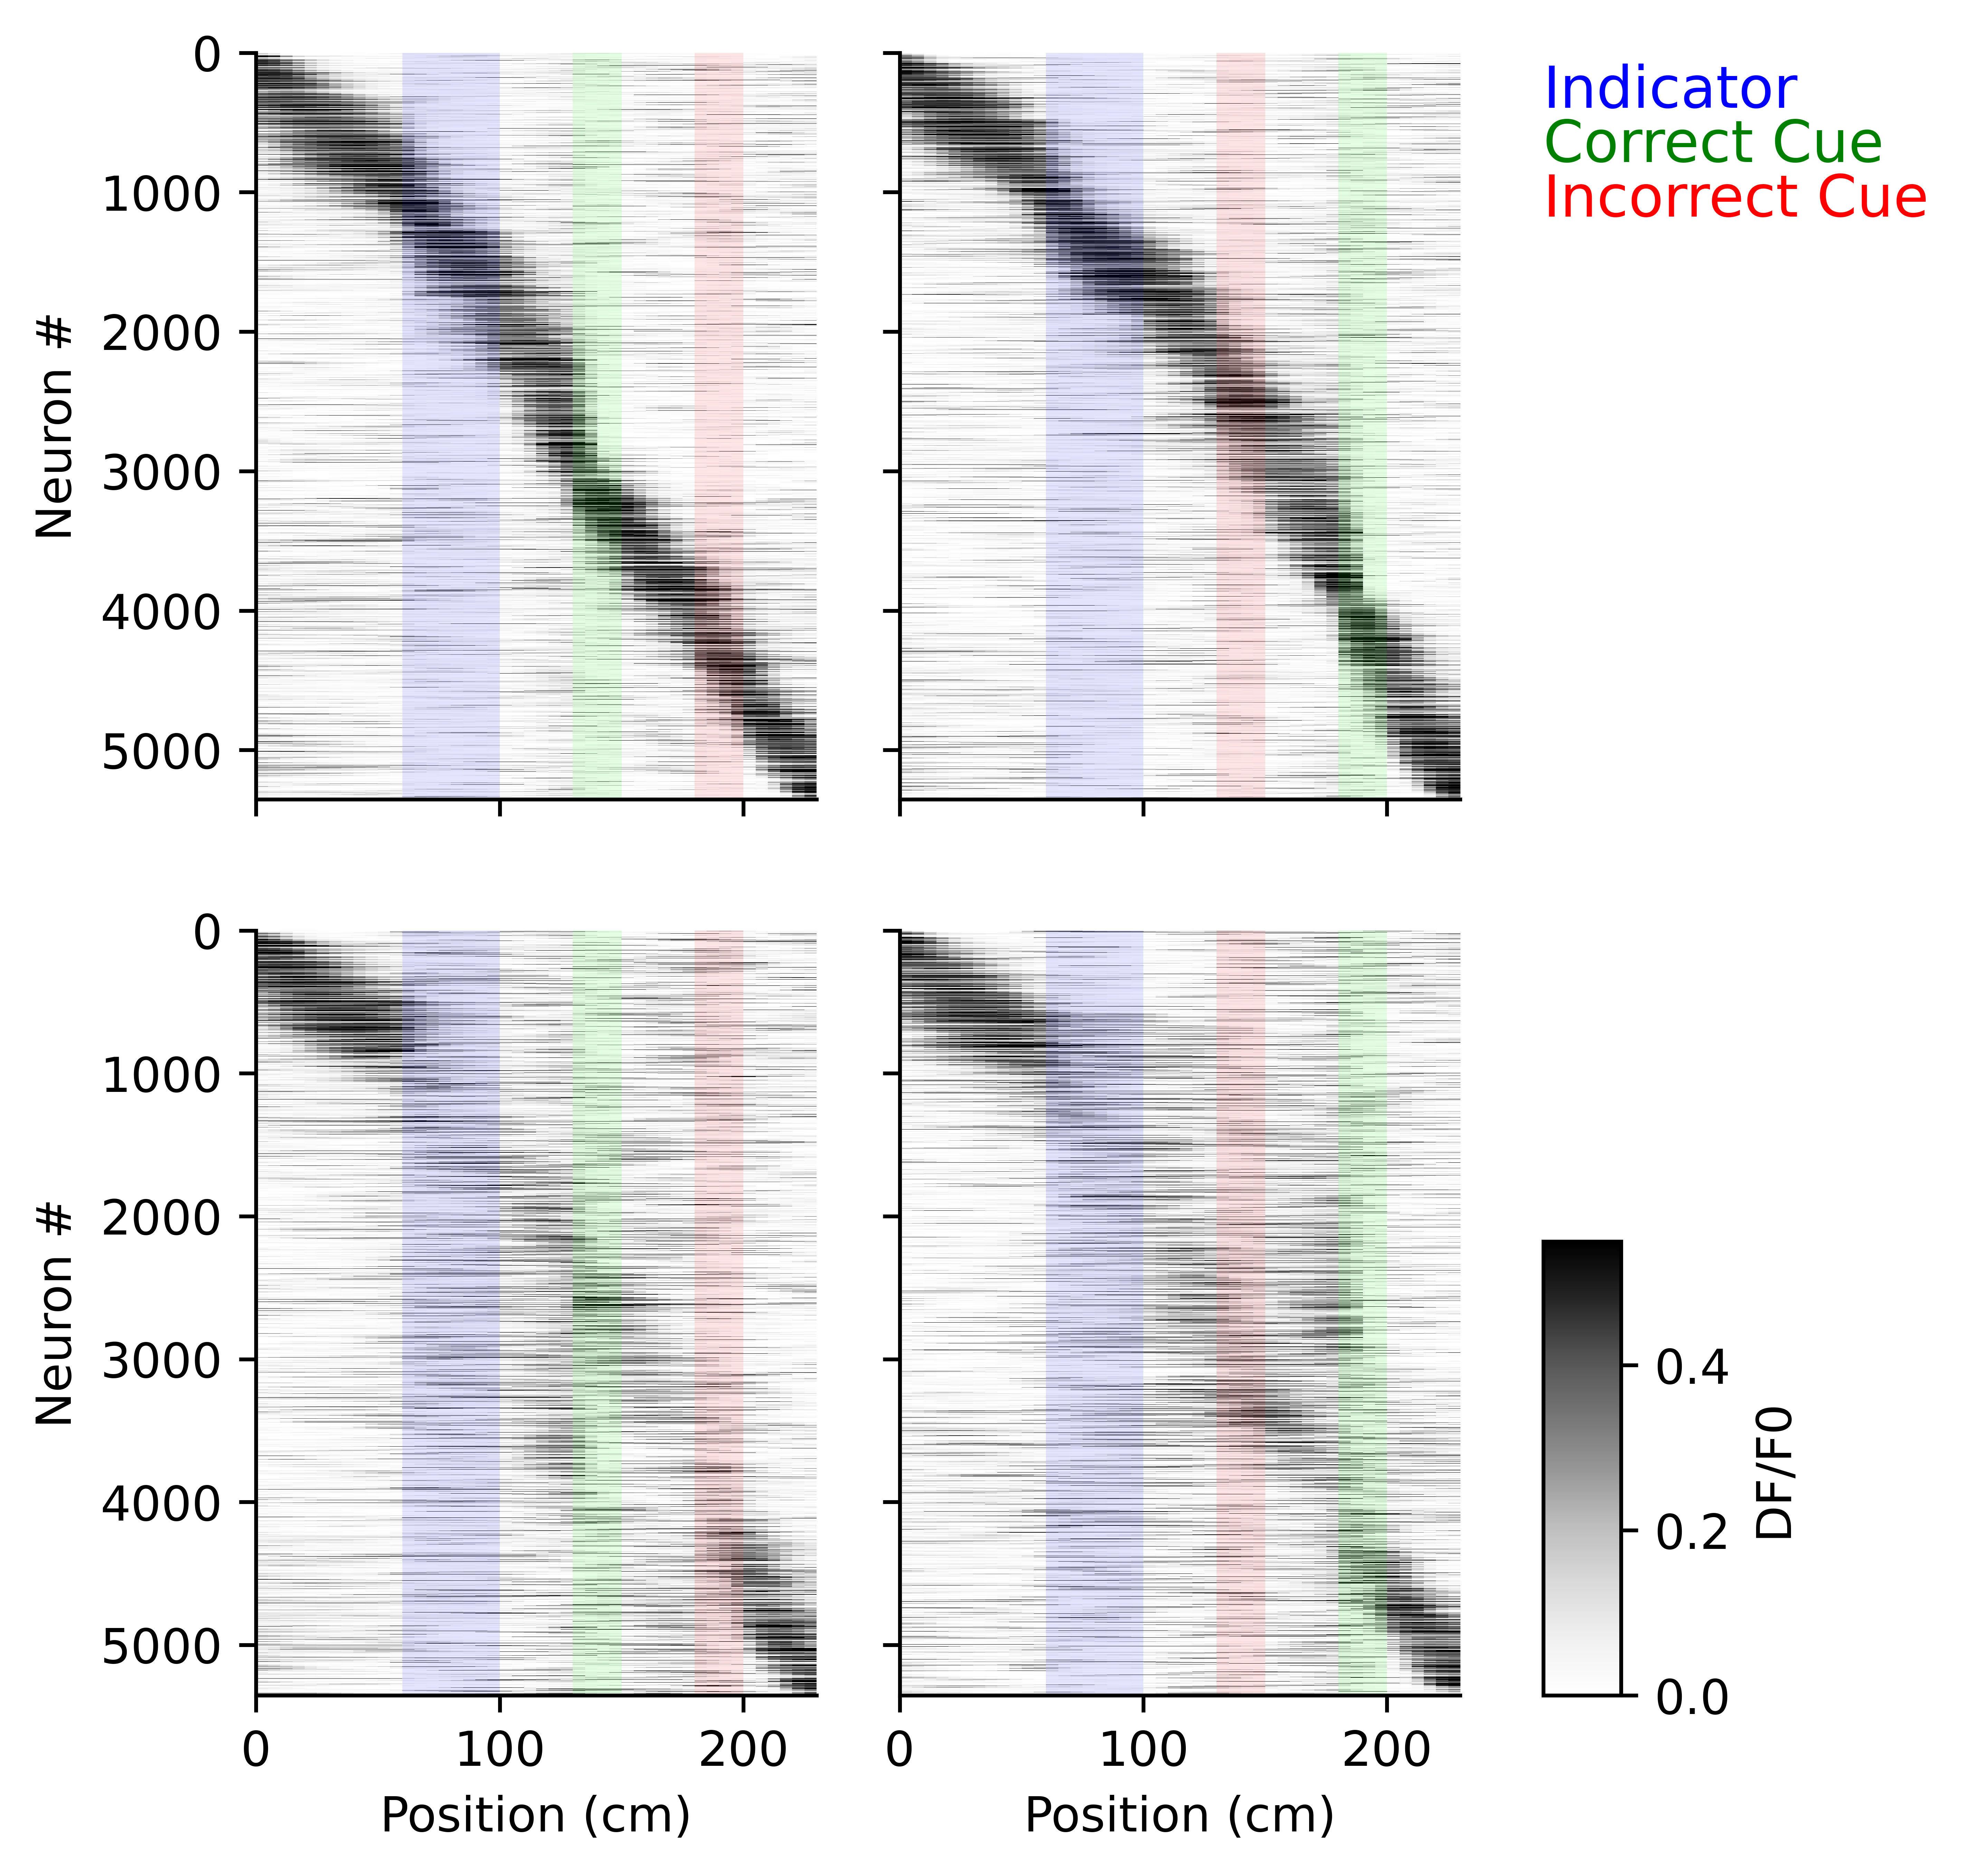

In [61]:
session = 8 

vmin = 0
vmax = 0.55
region_marker_opacity = 0.1
dpi = 1000

fig = plt.figure(figsize=(6,7),edgecolor='black',dpi=dpi,facecolor='white')
axs = {
    'T1xT1': fg.place_axes_on_grid(fig, xspan=[0, .35], yspan=[0.1, .515]),
    'T2xT2': fg.place_axes_on_grid(fig, xspan=[0.4, .75], yspan=[0.1, .515]),
    'T1xT2': fg.place_axes_on_grid(fig, xspan=[0, .35], yspan=[0.585, 1]),
    'T2xT1': fg.place_axes_on_grid(fig, xspan=[0.4, .75], yspan=[0.585, 1]),
    'colorbar': fg.place_axes_on_grid(fig, xspan=[0.8, 0.85], yspan=[0.75, 1]),
    'legends': fg.place_axes_on_grid(fig, xspan=[0.8, 1], yspan=[0.1, 0.4]),
}
# labels = [
#     {'label_text':f"{animal} - Session {session}", 'xpos':0.45,    'ypos':0.05, 'fontsize':12, 'weight': 'bold', 'ha': 'center', 'va': 'bottom'},
# ]
# fg.add_labels(fig, labels)

# format axis.
# axs['T1xT1'].title.set_text('T1')
# axs['T2xT2'].title.set_text('T2')
# axs['T1xT2'].title.set_text('T1 ordered by T2')
# axs['T2xT1'].title.set_text('T2 ordered by T1')

axs['T1xT1'].set_xticklabels('')
axs['T2xT2'].set_xticklabels('')
axs['T2xT2'].set_yticklabels('')
axs['T2xT1'].set_yticklabels('')

axs['T1xT1'].set_ylabel('Neuron #')
axs['T1xT2'].set_ylabel('Neuron #')
axs['T1xT2'].set_xlabel('Position (cm)')
axs['T2xT1'].set_xlabel('Position (cm)')

def plot_axis(ax,im,color1,color2):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    h = ax.imshow(im,aspect='auto',interpolation='none',cmap='Greys',
                  extent=(0,230,im.shape[0],0),vmin=vmin,vmax=vmax)
    # plot reward pos
    ax.axvspan(130,150,facecolor=color1,edgecolor=None)
    ax.axvspan(180,200,facecolor=color2,edgecolor=None)
    ax.axvspan(60,100,facecolor=(0,0,1,region_marker_opacity),edgecolor=None)
    return h

# plot heatmap.
correct_color = (0,1,0,region_marker_opacity)
incorrect_color = (1,0,0,region_marker_opacity)
h = plot_axis(axs['T1xT1'],binF_T1[session][pf_all_T1[session]['order'],:],correct_color,incorrect_color)
plot_axis(axs['T2xT2'],binF_T2[session][pf_all_T2[session]['order'],:],incorrect_color,correct_color)
plot_axis(axs['T1xT2'],binF_T1[session][pf_all_T2[session]['order'],:],correct_color,incorrect_color)
plot_axis(axs['T2xT1'],binF_T2[session][pf_all_T1[session]['order'],:],incorrect_color,correct_color)

# legends.
ax = axs['legends']
ax.axis('off')
ax.text(0, 0.9, 'Indicator', fontsize=12, color='blue')
ax.text(0, 0.8, 'Correct Cue', fontsize=12, color='green')
ax.text(0, 0.7, 'Incorrect Cue', fontsize=12, color='red')

# colorbar.
cb = fig.colorbar(h,cax=axs['colorbar'])
cb.set_label('DF/F0')

plt.savefig(f'Fig_2_place_field_session_{session+1}.pdf', dpi=dpi, bbox_inches='tight')

## Plot 2D correlation for specific days for figure

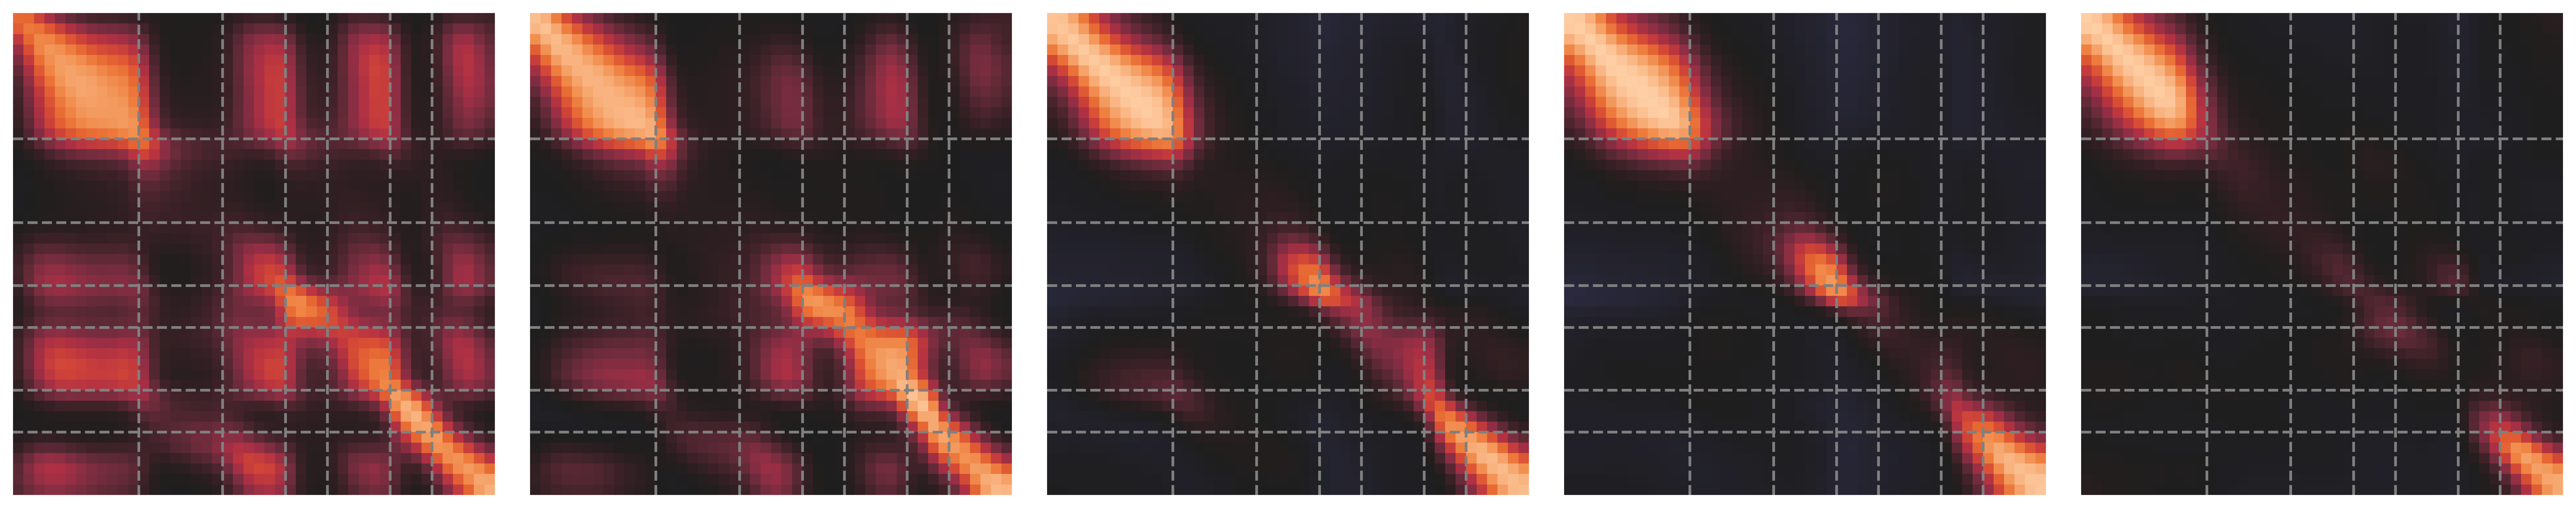

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

n_days = binF_T1_all.shape[2]
n_cols = 5  # Plotting 4 sessions + 1 for the colorbar
n_positions = binF_T1_all.shape[0]

sessions_to_plot = [0, 1, 2, 3, 8]

fig, axs = plt.subplots(1, n_cols, figsize=(20, 4), dpi=600)

for index, Session in enumerate(sessions_to_plot):
    corr_matrix1 = np.zeros((n_positions, n_positions))
    for i in range(n_positions):
        for j in range(n_positions):
            corr, _ = pearsonr(binF_T1_all[i, :, Session], binF_T2_all[j, :, Session])
            corr_matrix1[i, j] = corr

    sns.heatmap(corr_matrix1, cmap='icefire', vmin=-1, vmax=1, ax=axs[index], 
                cbar=False, xticklabels=False, yticklabels=False, linewidths=0)  # set linewidths to 0
    #axs[index].set_title(f"Session {Session+1}")  # add title back
    axs[index].set_aspect('equal')  # make each subplot square
    for lines in [12, 20, 26, 30, 36, 40]:  
        axs[index].axvline(lines, linestyle='--', color='gray', linewidth=1.5)
        axs[index].axhline(lines, linestyle='--', color='gray', linewidth=1.5)


plt.tight_layout()

plt.savefig('corr_plot.pdf', format='pdf', dpi=600)
plt.show()
